In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Data/cleaned_df.csv')
df.tags.head(20)

0                                       SHANtell martin
1     rhett and link. gmm. good mythical morning. rh...
2     ijustine. week with iPhone X. iphone x. apple....
3     5 Ice Cream Gadgets. Ice Cream. Cream Sandwich...
4     Trailer. Hugh Jackman. Michelle Williams. Zac ...
5     vox.com. vox. explain. shift change. future of...
6     NFL. Football. offense. defense. afc. nfc. Ame...
7     The Walking Dead. shiva. tiger. king ezekiel. ...
8     marshmello. blocks. marshmello blocks. blocks ...
9     nowthis. nowthis world. world news. nowthis ne...
10    shopping for new fish. new fish. aquarium fish...
11    Robots. Boston Dynamics. SpotMini. Legged Loco...
12    pacific rim. pacific rim 2. pacific rim sequel...
13    TED. TED-Ed. TED Education. TED Ed. Hilary Col...
14    ultralight. airplane. homemade. DIY. hoverbike...
15    SciShow. science. Hank. Green. education. lear...
16    life noggin. life noggin youtube. youtube life...
17    tested. testedcom. designercon 2017. previ

In [3]:
# Setting data and taget variables
X = df['tags']
y = df['views']

In [4]:
# Initiating train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [5]:
# Convert a collection of text documents to a matrix of token counts using the train data
tfidf = TfidfVectorizer(tokenizer = sent_tokenize, max_features = 1000, strip_accents = 'unicode')

tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_train = pd.DataFrame(tfidf_data_train.toarray(), columns = tfidf.get_feature_names())

tfidf_data_train

,#youtubeblack.,08282016ntflxuscan.,2017.,2018.,360 degrees.,4k.,abc.,abs online.,abs-cbn entertainment.,abs-cbn online.,...,父亲的身份noah.,生逢灿烂的日子noah.,离婚律师noah.,红色宝藏noah.,蔡英文.,都市.,電視劇.,青云志noah.,风中奇缘noah.,鬼吹灯noah.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300934,0.298342,0.28301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Convert a collection of text documents to a matrix of token counts using the test data
tfidf_data_test = tfidf.transform(X_test)
tfidf_data_test = pd.DataFrame(tfidf_data_test.toarray(), columns = tfidf.get_feature_names())

tfidf_data_test

,#youtubeblack.,08282016ntflxuscan.,2017.,2018.,360 degrees.,4k.,abc.,abs online.,abs-cbn entertainment.,abs-cbn online.,...,父亲的身份noah.,生逢灿烂的日子noah.,离婚律师noah.,红色宝藏noah.,蔡英文.,都市.,電視劇.,青云志noah.,风中奇缘noah.,鬼吹灯noah.
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5030,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5031,0.0,0.0,0.0,0.0,0.172952,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5032,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs=-1, verbose=2, max_depth = 50)

In [8]:
# Fitting the data to the regressor model
regressor.fit(tfidf_data_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.5min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 16.4min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=2, warm_start=False)

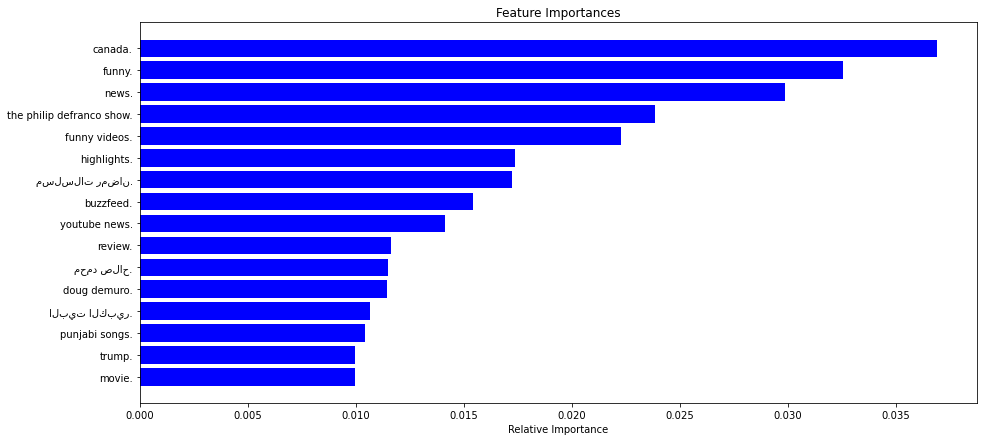

In [9]:
# Plotting the top 16 impotant features
features = tfidf_data_train.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)[-16:]

plt.figure(figsize=(15,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.savefig('figures/feature_imp_tfidf.png')

plt.show()

In [10]:
# Making function for r-squared and root-mean squared error
from sklearn.metrics import r2_score

def rf_scores(x_data, y_data):
    train_predict = regressor.predict(x_data)
    
    print('R Squared = ', regressor.score(x_data, y_data))
    print('Root-Mean Sqrd Error = ', mean_squared_error(y_data, train_predict)**.5)

In [11]:
# Calling scores function for train data
rf_scores(tfidf_data_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s


R Squared =  0.3407545681584708
Root-Mean Sqrd Error =  189268.34052012488


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [12]:
# Calling scores function for test data
rf_scores(tfidf_data_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s


R Squared =  0.17257712590673735
Root-Mean Sqrd Error =  213632.30865296608


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [13]:
# conda install -c districtdatalabs yellowbrick
from sklearn.linear_model import Ridge

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

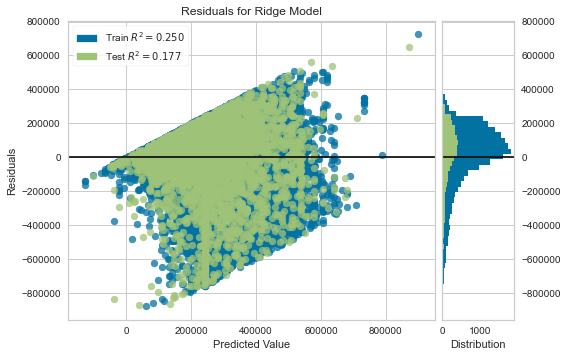

In [14]:
# Plotting residual plot
model = ResidualsPlot(Ridge())
model.fit(tfidf_data_train, y_train)
model.score(tfidf_data_test, y_test)
model.show()